=== Image Information ===
Image Shape: (500, 500)
Image Data Type: uint8
Image Intensity Range: [34, 247]

=== Gradient Statistics ===
Original Gradient Range: [0.00, 677.40]
Normalized Gradient Range: [0, 255]

=== Sharpening Statistics ===
Sharpened Image Range: [39, 255]
Edge Enhancement Amount: Mean Gradient = 15.92


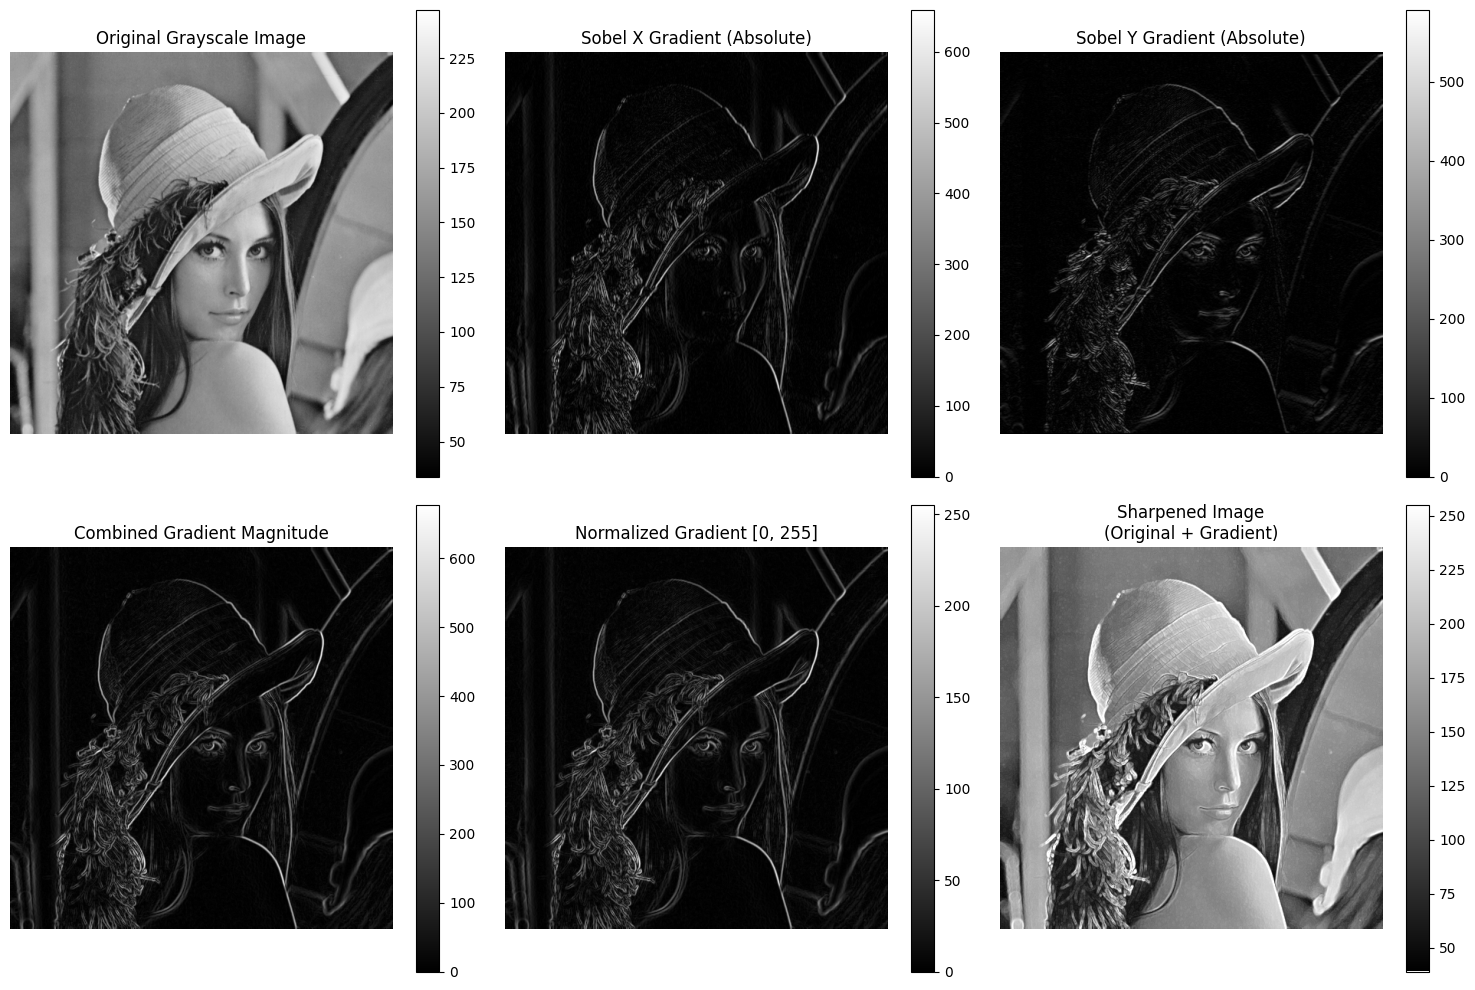

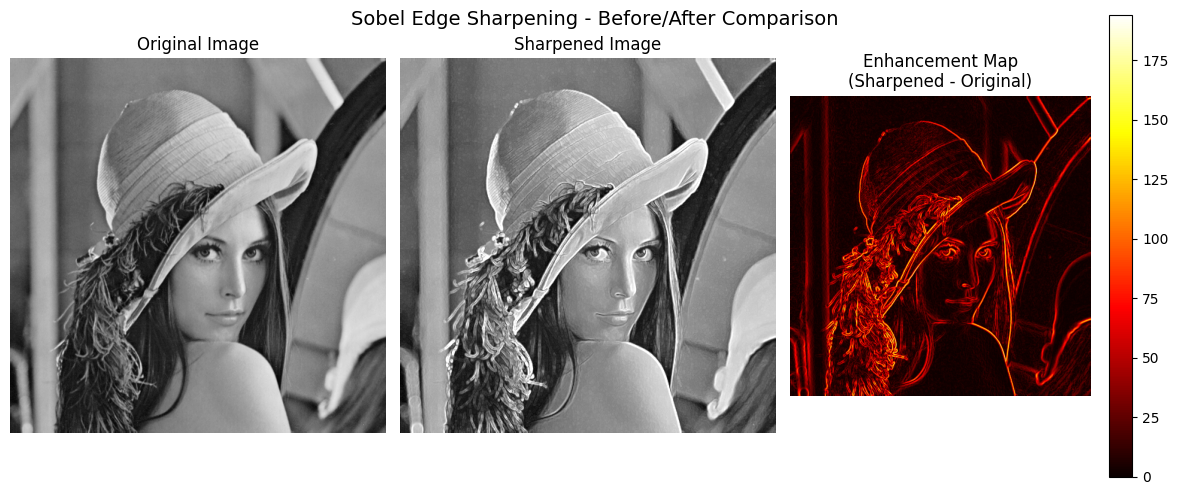


=== Edge Detection Comparison ===


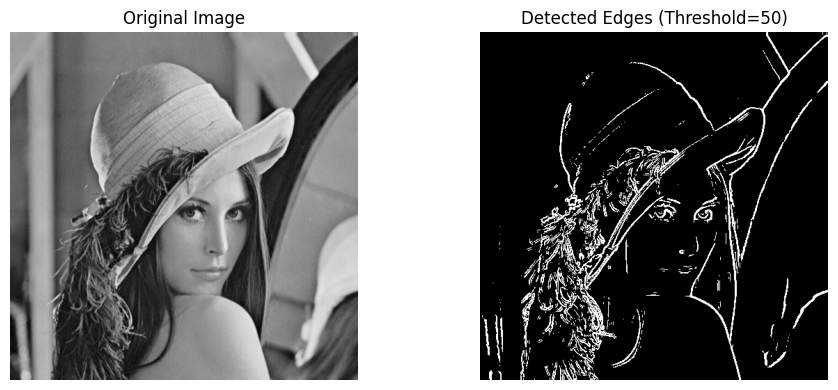

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load grayscale image
# Load the image in grayscale mode
image = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)  # Change to your image path

# If image not found, create a sample image for demonstration
if image is None:
    print("Image not found! Creating a sample image.")
    # Create a sample image with edges
    image = np.ones((300, 400), dtype=np.uint8) * 128
    # Add some shapes with different intensities
    cv2.rectangle(image, (50, 50), (150, 150), 200, -1)
    cv2.circle(image, (300, 100), 50, 100, -1)
    cv2.line(image, (50, 200), (350, 250), 180, 3)
    cv2.putText(image, 'Sample', (150, 280), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, 220, 2)

print("=== Image Information ===")
print(f"Image Shape: {image.shape}")
print(f"Image Data Type: {image.dtype}")
print(f"Image Intensity Range: [{image.min()}, {image.max()}]")

# 2. Calculate edges using Sobel operator
# Calculate gradients in X direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Calculate gradients in Y direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate combined gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

print(f"\n=== Gradient Statistics ===")
print(f"Original Gradient Range: [{gradient_magnitude.min():.2f}, {gradient_magnitude.max():.2f}]")

# 3. Normalize gradient magnitude to [0, 255]
# Method 1: Simple normalization
gradient_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
gradient_normalized = gradient_normalized.astype(np.uint8)

# Method 2: Alternative normalization (scaling by max value)
# This preserves more of the relative gradient intensities
gradient_scaled = (gradient_magnitude / gradient_magnitude.max() * 255).astype(np.uint8)

# We'll use the simple normalized version
gradient_final = gradient_normalized

print(f"Normalized Gradient Range: [{gradient_final.min()}, {gradient_final.max()}]")

# 4. Add gradient to original image (sharpening)
# Method 1: Using cv2.add to prevent overflow
sharpened_image = cv2.add(image, gradient_final)

# Method 2: Using numpy with clipping (alternative)
# sharpened_image = np.clip(image.astype(np.int16) + gradient_final.astype(np.int16), 0, 255).astype(np.uint8)

print(f"\n=== Sharpening Statistics ===")
print(f"Sharpened Image Range: [{sharpened_image.min()}, {sharpened_image.max()}]")
print(f"Edge Enhancement Amount: Mean Gradient = {gradient_final.mean():.2f}")

# 5. Display all images
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.colorbar()

# Sobel X gradient
plt.subplot(2, 3, 2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel X Gradient (Absolute)')
plt.axis('off')
plt.colorbar()

# Sobel Y gradient
plt.subplot(2, 3, 3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Y Gradient (Absolute)')
plt.axis('off')
plt.colorbar()

# Combined gradient magnitude
plt.subplot(2, 3, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Combined Gradient Magnitude')
plt.axis('off')
plt.colorbar()

# Normalized gradient
plt.subplot(2, 3, 5)
plt.imshow(gradient_final, cmap='gray')
plt.title('Normalized Gradient [0, 255]')
plt.axis('off')
plt.colorbar()

# Sharpened image
plt.subplot(2, 3, 6)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image\n(Original + Gradient)')
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.show()

# Additional comparison: Original vs Sharpened
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

# Difference image (enhancement visualization)
plt.subplot(1, 3, 3)
enhancement = sharpened_image.astype(np.int16) - image.astype(np.int16)
plt.imshow(enhancement, cmap='hot')
plt.title('Enhancement Map\n(Sharpened - Original)')
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.suptitle('Sobel Edge Sharpening - Before/After Comparison', fontsize=14)
plt.show()

# Edge detection comparison
print("\n=== Edge Detection Comparison ===")
# Simple thresholding on gradient for edge detection
edges = cv2.threshold(gradient_final, 50, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges (Threshold=50)')
plt.axis('off')
plt.tight_layout()
plt.show()